In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import math
%matplotlib inline

In [2]:
# r, b
def cal_p(x,r,b):
    return 1 - (1 - x**r)**b

def LSHplot(param_sets, req):
    # similarity
    x = np.linspace(0, 1, 1000)
    plt.axis([-0.02, 1.02, -0.02, 1.02])
    for i in range(len(param_sets)):
        r = param_sets[i][0]
        b = param_sets[i][1]
        p = 1 - (1 - x**r)**b
        threshold = (1/b)**(1/r)
        cal_p = lambda x, r, b: 1-(1-x**r)**b
        v1, err = integrate.quad(cal_p, 0, threshold, args = (r,b))
        v2, err = integrate.quad(cal_p, threshold, 1, args = (r,b))
        TP = v2
        FN = (1-threshold) - v2
        FP = v1
        F1 = TP/(TP+0.5*(FN+FP))
        param_sets[i].append(cal_p(0.3, r, b))
        param_sets[i].append(cal_p(0.8, r, b))
        param_sets[i].append(threshold)
        param_sets[i].append(FN)
        param_sets[i].append(FP)
        param_sets[i].append(F1)
        label_ = 'r='+str(r)+',b='+str(b)
        plt.plot(x, p, label = label_)
        plt.xlabel("Similarity")
        plt.ylabel("Prob. sharing a bucket")
    plt.plot(req[0],req[2], marker = 'x', c = 'k', markersize = 5)
    plt.plot(req[1],req[3], marker = 'x', c = 'k', markersize = 5)
    plt.vlines(req[0], -0.02, req[2], linestyles = 'dashed', color = 'k')
    plt.vlines(req[1], req[3],1.02, linestyles= 'dashed', color = 'k')
    plt.hlines(req[3], -0.02, req[1], linestyles = 'dashed', color = 'k')
    plt.hlines(req[2], req[0], 1.02, linestyles = 'dashed', color = 'k')
    plt.legend()

In [3]:
def rbPlot(a,b,requirements):
    # similarity
    r = np.linspace(a, b, 100)
    t1 = requirements[0]
    t2 = requirements[1]
    p1 = requirements[2]
    p2 = requirements[3]
    b1 = [math.log((1-p1), (1-t1**r_i)) for r_i in r]
    b2 = [math.log((1-p2), (1-t2**r_i)) for r_i in r]
    z1 = np.array(b1)
    z2 = np.array(b2)
    plt.plot(r, b1, label = 'T1 = 0.8, P1 = 0.95')
    plt.plot(r, b2, label = 'T2 = 0.3, P2 = 0.05')
    plt.fill_between(r, b1, b2,where=z2>z1, facecolor = 'bisque')
    plt.xlabel('r')
    plt.ylabel('b')
    plt.legend()
    

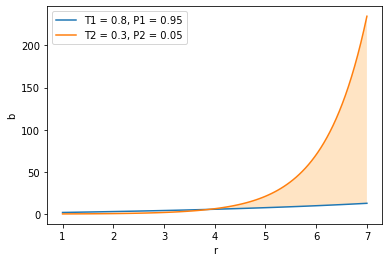

In [7]:
requirements = [0.8, 0.3, 0.95, 0.05] # T1, T2, P1, P2
rbPlot(1,7,requirements)

,r,b,s=0.3,s=0.8,threshold,FN,FP,F1-Score
0,3,5,0.127904,0.972324,0.584804,0.032997,0.117114,0.835856
1,5,20,0.047494,0.999644,0.549280,0.024090,0.072020,0.898764
2,10,10,0.000059,0.678860,0.794328,0.015188,0.057895,0.839041
3,10,20,0.000118,0.896869,0.741134,0.015563,0.053535,0.875657
4,10,30,0.000177,0.966881,0.711685,0.015402,0.051257,0.891167
5,6,15,0.010879,0.989539,0.636773,0.022228,0.072015,0.878591


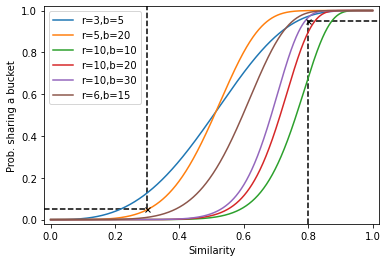

In [9]:
param_sets = [[5,10], [5,20], [10,10], [10, 20],[10,30],[6,15]]
param_sets = [[3,5], [5,20], [10,10], [10, 20],[10,30],[6,15]]
requirements = [0.8, 0.3, 0.95, 0.05] # T1, T2, P1, P2

LSHplot(param_sets, requirements)
result = pd.DataFrame(param_sets, columns = ['r','b','s=0.3','s=0.8','threshold','FN', 'FP', 'F1-Score'])
result